## Laplacien Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

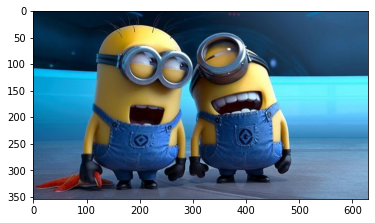

In [2]:
#Loading thr image using matplotlib.pyploy
img=plt.imread("minion.jpeg")
plt.imshow(img)

In [3]:
def  bw(img):
    I=np.zeros((img.shape[0],img.shape[1]))
    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            I[i][j]=np.round(np.mean(img[i][j]))
            
    return I

(354, 630)

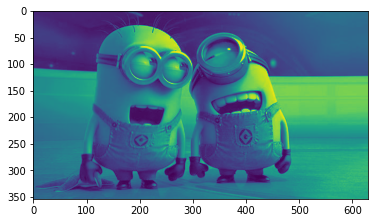

In [4]:
i=bw(img)
plt.imshow(i)
i.shape

In [5]:
#filtre hexa en utilisant numpy avec median
def medhex(img):
    L=np.zeros(img.shape)
    m=[]
    p=img.shape[0]-1
    q=img.shape[1]-2
    L[0,:]=img[0,:]
    L[:,0]=img[:,0]
    L[p-1,:]=img[p-1,:]
    L[:,p-1]=img[:,p-1]
    for i in range(1,p-1,1):
        for j in range(2,q-1,1):
            L[i][j]=np.median((img[i-1][j-1],img[i-1][j+1],img[i][j-2],img[i][j],img[i][j+2],img[i+1][j-1],img[i+1][j+1]))          
                
    return L

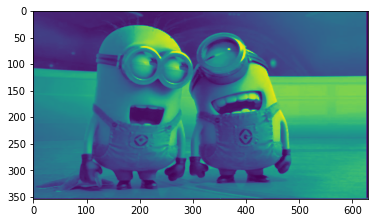

In [6]:
imgameleore=medhex(i)
plt.imshow(imgameleore)

#### Explain Laplacien

In this case we used the laplacien kernel filter [[-1 -1 -1],[-1 8 -1],[-1 -1 -1]] to generate the laplacien image then we eliminate irrelivant pixels in the image and finally we perform an operation to generate better points

In [7]:
def Laplacien(img):
    L=np.zeros(img.shape)
    p=img.shape[0]-1
    q=img.shape[1]-1
    for i in range(1,p,1):
        for j in range(1,q,1):
            L[i][j]=np.sum(img[i-1][j-1]*(-1)+img[i-1][j]*(-1)+img[i-1][j+1]*(-1)+img[i][j-1]*(-1)+img[i][j]*8+img[i][j+1]*(-1)+img[i+1][j-1]*(-1)+img[i+1][j]*(-1)+img[i+1][j+1]*(-1))/9
    return L

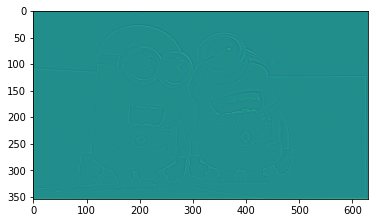

In [8]:
l=Laplacien(imgameleore)
plt.imshow(l)

#### Remove irrelivant pixels 

We dont just remove irrelivant pixels here but we ceil pixels above a certain threshold and eliminate if below the threshold.

In [9]:
#comparer parraport a un seuil pour trouver des point contour
def seilayage(img):
    L=np.zeros(img.shape)
    p=img.shape[0]
    q=img.shape[1]
    #seuil = mean de tous les pixels
    seuil=10
    for i in range(0,p,1):
        for j in range(0,q,1):
            if(img[i][j]>=seuil):
                L[i][j]=255  
            else:
                L[i][j]=0
    return L

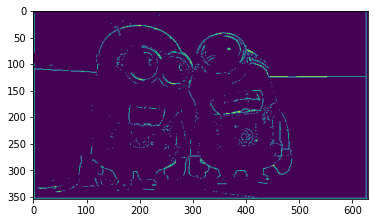

In [10]:
p=seilayage(l)
plt.imshow(p)

In [11]:
#contour zeros
def polcon(img):
    L=np.zeros(img.shape)
    p=img.shape[0]
    q=img.shape[1]
    #seuil = mean de tous les pixels
    seuil=np.mean(img)
    prec=img[0][0]
    for i in range(1,p,1):
        for j in range(0,q,1):
            if((prec==0 and img[i][j]==255)or(prec==255 and img[i][j]==0)):
                L[i][j]=255 
            else:
                L[i][j]=0
            prec=img[i][j]
    return L

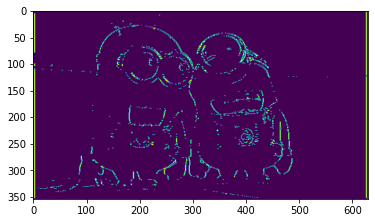

In [12]:
q=polcon(p)
plt.imshow(q)
plt.imsave("contourlaplacien.jpeg",q)

### Laplacien  on an image without improvement

In [13]:
def laplacien_img(img):
    l=Laplacien(img)
    p=seilayage(l)
    q=polcon(p)
    return q

In [14]:
lap_img=laplacien_img(i)

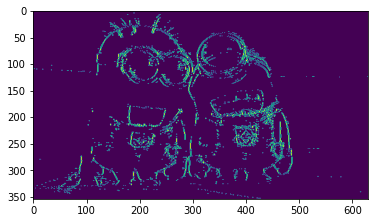

In [15]:
plt.imshow(lap_img)

We can see the difference between the two images.The second image shows a good contour points but not as smoothe as the image that we improved.